https://www.kaggle.com/datasf/sf-library-usage-data#Library_Usage.csv
# understand information

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "Library_Usage_201909.csv"
df = pd.read_csv(path)
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,July,2016,p,phone,False,2003,False,9.0
1,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
3,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
4,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
Patron Type Code                423448 non-null int64
Patron Type Definition          423448 non-null object
Total Checkouts                 423448 non-null int64
Total Renewals                  423448 non-null int64
Age Range                       423233 non-null object
Home Library Code               423408 non-null object
Home Library Definition         423448 non-null object
Circulation Active Month        423448 non-null object
Circulation Active Year         423448 non-null object
Notice Preference Code          423448 non-null object
Notice Preference Definition    423448 non-null object
Provided Email Address          423448 non-null bool
Year Patron Registered          423448 non-null int64
Outside of County               423448 non-null bool
Supervisor District             313138 non-null float64
dtypes: bool(2), float64(1), int64(4), object(8)
memory usage: 42.8+ MB

In [4]:
#column rename
df = df.rename(columns = {"Patron Type Code":'pt_code',
                         "Patron Type Definition":"pt_def",
                         "Total Checkouts":"total_co",
                         "Total Renewals":"total_rn",
                         "Age Range":"age_range",
                         "Home Library Code":"ho_lib_code",
                         "Home Library Definition":"ho_lib_def",
                         "Circulation Active Month":"active_month",
                         "Circulation Active Year":"active_year",
                         "Notice Preference Code":"notice_prefer_code",
                         "Notice Preference Definition":"notice_prefer_def",
                         "Provided Email Address":"provided_email",
                         "Year Patron Registered":"year_reg",
                         "Outside of County":"out_of_country",
                         "Supervisor District":"supervisor_district"})

## add circulation active time in datetime format
combine the two columns: active_month and active_year;  
transfer the data type to datetime

In [5]:
df.active_month = df.active_month.replace({"January":"01",
                                        "February":"02",
                                        "March":"03",
                                        "April":"04",
                                        "May":"05",
                                        "June":"06",
                                        "July":"07",
                                        "August":"08",
                                        "September":"09",
                                        "October":"10",
                                        "November":"11",
                                        "December":"12"})
df['active_time'] = df['active_year'].str.cat(df.active_month, sep = " ")
df.active_time.replace('None None',np.nan, inplace = True)
df.active_time.value_counts()
df.active_time = pd.to_datetime(df.active_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pt_code              423448 non-null  int64         
 1   pt_def               423448 non-null  object        
 2   total_co             423448 non-null  int64         
 3   total_rn             423448 non-null  int64         
 4   age_range            423233 non-null  object        
 5   ho_lib_code          423408 non-null  object        
 6   ho_lib_def           423448 non-null  object        
 7   active_month         423448 non-null  object        
 8   active_year          423448 non-null  object        
 9   notice_prefer_code   423448 non-null  object        
 10  notice_prefer_def    423448 non-null  object        
 11  provided_email       423448 non-null  bool          
 12  year_reg             423448 non-null  int64         
 13  out_of_country

# patron describe
## patron type and age

In [8]:
patron_def = df.pt_def.value_counts().reset_index()
patron_def

,index,pt_def
0,ADULT,272251
1,JUVENILE,59208
2,SENIOR,41619
3,YOUNG ADULT,28816
4,WELCOME,14931
5,TEACHER CARD,1782
6,DIGITAL ACCESS CARD,1744
7,SPECIAL,977
8,STAFF,862
9,VISITOR,415


In [9]:
patron_code = df.pt_code.value_counts().reset_index()
patron_type = pd.merge(left = patron_def, right = patron_code, 
                       left_on = 'pt_def', right_on = 'pt_code')
patron_type.pop('pt_def')
patron_type.rename(columns = {"index_x":"patron_def",
                             "index_y":"patron_code",
                             "pt_code":"count"}, inplace = True)
patron_type = patron_type[['patron_code','patron_def','count']]
patron_type['patron_info'] = patron_type.patron_code.astype(str).str.cat(patron_type.patron_def, sep = ": ") #连接字符串
patron_type.sort_values(by = "patron_code", inplace = True)
patron_type
#patron_type.to_excel("2.1patron_type.xlsx")

,patron_code,patron_def,count,patron_info
0,0,ADULT,272251,0: ADULT
1,1,JUVENILE,59208,1: JUVENILE
3,2,YOUNG ADULT,28816,2: YOUNG ADULT
2,3,SENIOR,41619,3: SENIOR
4,4,WELCOME,14931,4: WELCOME
8,5,STAFF,862,5: STAFF
17,8,FRIENDS FOR LIFE,40,8: FRIENDS FOR LIFE
7,9,SPECIAL,977,9: SPECIAL
9,10,VISITOR,415,10: VISITOR
12,12,BOOKS BY MAIL,95,12: BOOKS BY MAIL


In [10]:
age_range = df.age_range.value_counts().reset_index()
age_range.sort_values(by = "index",inplace = True)
age_range.reset_index(drop = True, inplace = True)
#age_range.to_excel("2.1 age range.xlsx")
age_range.iloc[:,0] = age_range.iloc[:,0].str[:-5]
age_range.iloc[9,0] = "75 and over"
age_range

,index,age_range
0,0 to 9,38242
1,10 to 19,58944
2,20 to 24,29761
3,25 to 34,91083
4,35 to 44,67390
5,45 to 54,52492
6,55 to 59,21230
7,60 to 64,19800
8,65 to 74,30141
9,75 and over,14150


([], <a list of 0 Text xticklabel objects>)

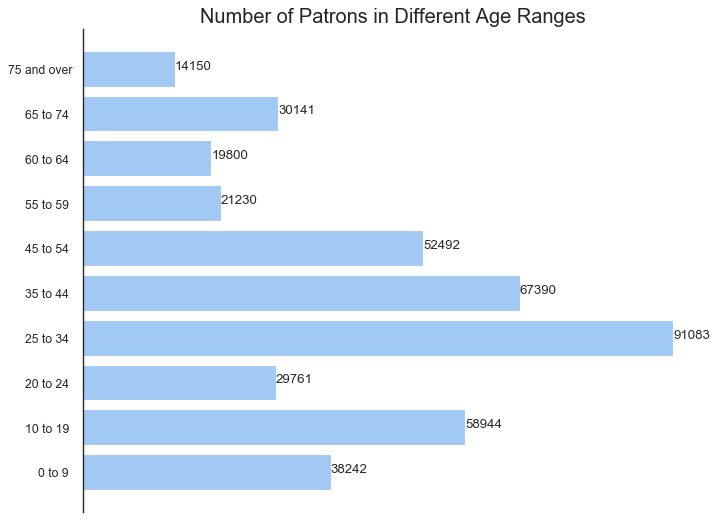

In [11]:
fig = plt.figure(figsize = (10,8), dpi = 80)
sns.set(style = "white",palette = "pastel")
ax = fig.add_subplot()
plt.barh(range(len(age_range)), age_range.age_range)
plt.title("Number of Patrons in Different Age Ranges", fontsize = 18)
ax.set_yticks(range(len(age_range)))
ax.set_yticklabels(age_range.iloc[:,0])
for x, y in zip(age_range.age_range, range(len(age_range))):
    plt.text(x, y, x)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
#plt.savefig("2.12 Number of patrons in different age ranges.png")

In [12]:
pt_age = df.groupby(['pt_def','age_range']).pt_code.count().unstack().fillna(0)
pt_age

age_range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
pt_def,,,,,,,,,,
ADULT,380.0,7491.0,26211.0,83127.0,64045.0,50163.0,20235.0,18707.0,1750.0,0.0
AT USER ADULT,3.0,0.0,12.0,77.0,78.0,59.0,31.0,37.0,49.0,3.0
AT USER JUVENILE,26.0,18.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AT USER SENIOR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,20.0,40.0
AT USER TEEN,0.0,29.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT USER WELCOME,0.0,0.0,10.0,15.0,8.0,3.0,0.0,3.0,6.0,0.0
BOOKS BY MAIL,0.0,0.0,1.0,1.0,3.0,4.0,10.0,6.0,26.0,43.0
DIGITAL ACCESS CARD,27.0,95.0,336.0,603.0,321.0,203.0,51.0,54.0,41.0,12.0
FRIENDS FOR LIFE,0.0,0.0,0.0,1.0,2.0,6.0,3.0,3.0,8.0,16.0


Wrong message: adult in the first age range? Most staffs in the first age range?

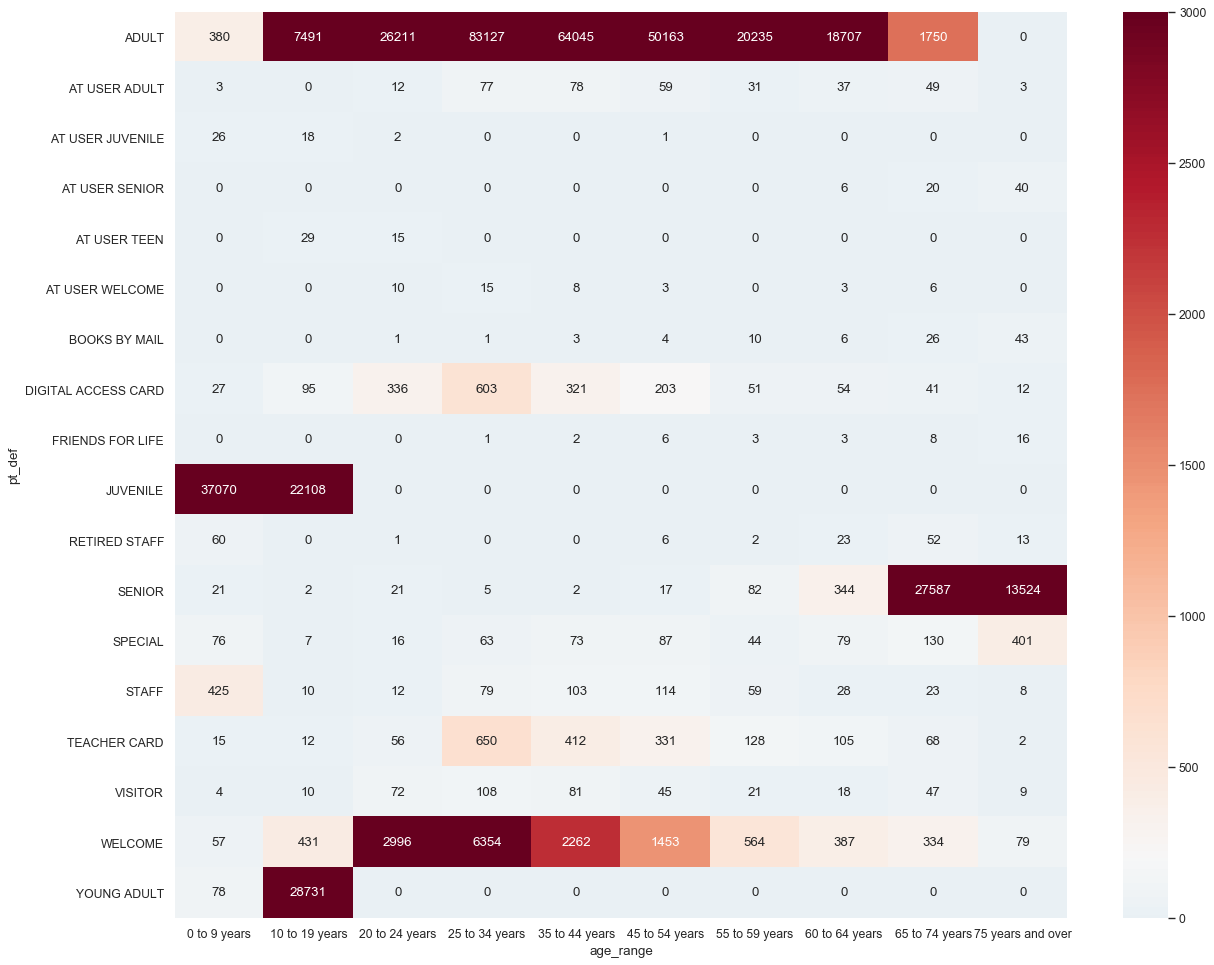

In [13]:
fig = plt.figure(figsize = (18, 15), dpi = 80)
sns.heatmap(pt_age, annot = True, robust = True, fmt ='g', center = 200,
           vmin = 0, vmax = 3000,cmap = 'RdBu_r')

## patron home library

In [14]:
df.ho_lib_def.value_counts()

Main Library                          124814
Mission                                25443
Richmond                               22475
Chinatown                              17140
Excelsior                              16706
Sunset                                 15020
Ortega                                 14456
West Portal                            13338
Mission Bay                            11271
Ingleside                              10738
Marina                                 10631
Merced                                 10502
Glen Park                               9811
Parkside                                9744
Western Addition                        9706
Bernal Heights                          9630
North Beach                             9162
Eureka Valley/Harvey Milk Memorial      8708
Portola                                 8659
Presidio                                8652
Bayview/Linda Brooks-Burton             8417
Noe Valley/Sally Brunn                  8399
Park      

In [15]:
df.ho_lib_def.nunique()

35

In [16]:
df.ho_lib_code.value_counts()

X        124814
M6        25443
R3        22475
C2        17140
E9        16706
          ...  
O2AAA         1
N6J           1
M2AAA         1
W2J           1
M8J           1
Name: ho_lib_code, Length: 79, dtype: int64

In [17]:
set(zip(df.ho_lib_def,df.ho_lib_code))

{("Children's Bookmobile", 'YJJ'),
 ('Anza', 'A5'),
 ('Bayview/Linda Brooks-Burton', 'B2'),
 ('Bernal Heights', 'B4'),
 ('Branch Bookmobile (Excelsior)', 'YB1'),
 ('Branch Bookmobile (Marina)', 'YB3'),
 ('Branch Bookmobile (Sunset)', 'YB4'),
 ('Branch Bookmobile (West Portal)', 'YB2'),
 ('Chinatown', 'C2'),
 ('Eureka Valley/Harvey Milk Memorial', 'E7'),
 ('Excelsior', 'E9'),
 ('Glen Park', 'G4'),
 ('Golden Gate Valley', 'G6'),
 ('Ingleside', 'I5'),
 ('Library on Wheels', 'YLW'),
 ('Main Library', 'X'),
 ('Marina', 'M2'),
 ('Merced', 'M4'),
 ('Mission Bay', 'M8'),
 ('Mission', 'M6'),
 ('Noe Valley/Sally Brunn', 'N4'),
 ('North Beach', 'N6'),
 ('Ocean View', 'O2'),
 ('Ortega', 'O7'),
 ('Park', 'P1'),
 ('Parkside', 'P3'),
 ('Portola', 'P5'),
 ('Potrero', 'P7'),
 ('Presidio', 'P9'),
 ('Richmond', 'R3'),
 ('Sunset', 'S7'),
 ('Unknown', 'AQUIS'),
 ('Unknown', 'B2AAA'),
 ('Unknown', 'B2AZZ'),
 ('Unknown', 'B4AAA'),
 ('Unknown', 'C2J'),
 ('Unknown', 'E7J'),
 ('Unknown', 'E9AAA'),
 ('Unknown', 

In [18]:
top10_ho_lib = df.groupby('ho_lib_def').pt_def.count().sort_values(ascending = False).reset_index()[:10]
top10_ho_lib = top10_ho_lib.rename(columns = {"pt_def":"patron_count"})
#top10_ho_lib.to_excel("2.12 top10 ho lib.xlsx")
top10_ho_lib

,ho_lib_def,patron_count
0,Main Library,124814
1,Mission,25443
2,Richmond,22475
3,Chinatown,17140
4,Excelsior,16706
5,Sunset,15020
6,Ortega,14456
7,West Portal,13338
8,Mission Bay,11271
9,Ingleside,10738


In [19]:
#home library & patron type
top10_data = df[df.ho_lib_def.isin(top10_ho_lib.ho_lib_def)]
main_pt = ["ADULT","JUVENILE","SENIOR","YOUNG ADULT","WELCOME"]

In [20]:
top10_main_pt = top10_data[top10_data.pt_def.isin(main_pt)]
top10_main_pt_num = top10_main_pt.groupby(["pt_def","ho_lib_def"]).pt_code.count().unstack()
top10_main_pt_num.sort_values(by = 'Chinatown', ascending = False,inplace = True)
top10_order = top10_main_pt_num.iloc[0,:].sort_values(ascending = False)
top10_main_pt_num = top10_main_pt_num[top10_order.index]
top10_main_pt_num 

ho_lib_def,Main Library,Mission,Richmond,Chinatown,Sunset,Excelsior,Mission Bay,West Portal,Ortega,Ingleside
pt_def,,,,,,,,,,
ADULT,89798,16785,13610,10193,10005,9517,8765,7691,7323,7011
SENIOR,11804,1307,3008,2626,1758,1373,664,2065,1291,829
JUVENILE,6634,4327,3941,2519,1974,3537,1014,2168,3889,1652
YOUNG ADULT,6300,1902,1318,1446,872,1821,228,1074,1645,841
WELCOME,8224,830,353,233,274,323,509,190,123,290


Text(0.5, 1, 'Patron amount in TOP 10 libraries')

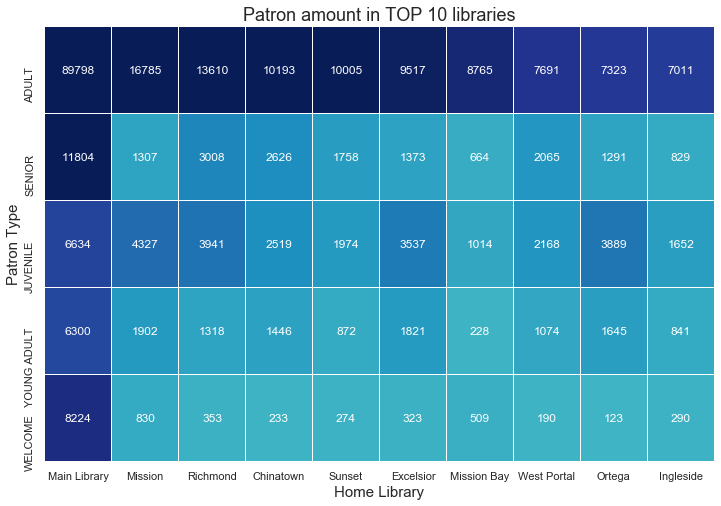

In [21]:
fig = plt.figure(figsize = (12,8))
sns.heatmap(top10_main_pt_num, vmax = 10000,center = 0,
           annot = True, fmt = 'd', linewidth = .2,
           cmap = 'YlGnBu',cbar = False)
plt.xlabel('Home Library', fontsize = 15)
plt.ylabel('Patron Type', fontsize = 15)
plt.title('Patron amount in TOP 10 libraries', fontsize = 18)
#plt.savefig('2.1 Patron amount in top 10 libraries.png')

In [22]:
#home library % patron age range
top10_main_ar = top10_data[top10_data.pt_def.isin(main_pt)]
top10_main_ar_num = top10_main_pt.groupby(["age_range","ho_lib_def"]).pt_code.count().unstack()
top10_order_ar = top10_main_ar_num.iloc[0,:].sort_values(ascending = False)
top10_main_ar_num = top10_main_ar_num[top10_order_ar.index]
top10_main_ar_num 

ho_lib_def,Main Library,Mission,Richmond,Ortega,Excelsior,Chinatown,Sunset,West Portal,Ingleside,Mission Bay
age_range,,,,,,,,,,
0 to 9 years,4223,2740,2617,2522,2025,1342,1248,1231,979,804
10 to 19 years,10805,4010,3005,3355,3866,3130,1871,2285,1820,528
20 to 24 years,9377,1649,1245,815,1569,1242,867,869,1312,573
25 to 34 years,33301,5982,4153,1550,2587,2583,3481,1864,2306,3555
35 to 44 years,21106,4654,3316,1990,1984,2126,2433,1539,1369,2798
45 to 54 years,17145,2935,2643,1593,1784,1973,1752,1729,1098,1367
55 to 59 years,7634,992,975,575,703,887,708,776,467,447
60 to 64 years,6708,793,1155,533,628,1007,703,771,435,371
65 to 74 years,9025,1022,1925,870,975,1660,1231,1394,606,525


Text(0.5, 1, 'Age Range in TOP 10 Libraries')

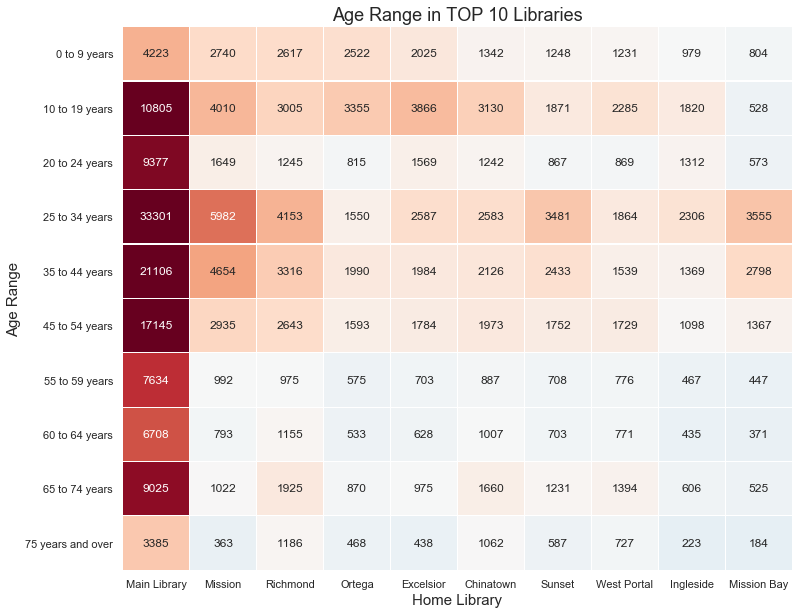

In [23]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(top10_main_ar_num , vmin = -1000, vmax = 10000,center = 1000,
           annot = True, fmt = 'd', linewidth = .2,
           cmap = 'RdBu_r',cbar = False)
plt.xlabel('Home Library', fontsize = 15)
plt.ylabel('Age Range', fontsize = 15)
plt.title('Age Range in TOP 10 Libraries', fontsize = 18)
#plt.savefig('2.1 Age Range in TOP 10 Libraries.png')

## patron registration

In [24]:
reg_year = df.year_reg.value_counts().reset_index().rename(columns = {"index":"registration_year",
                                                          "year_reg":"num"})

In [25]:
reg_year.sort_values(by = 'registration_year',inplace = True)
reg_year = reg_year.reset_index(drop = True)
reg_year

,registration_year,num
0,2003,69257
1,2004,8994
2,2005,9668
3,2006,10776
4,2007,13289
5,2008,20518
6,2009,22307
7,2010,24321
8,2011,26531
9,2012,37395


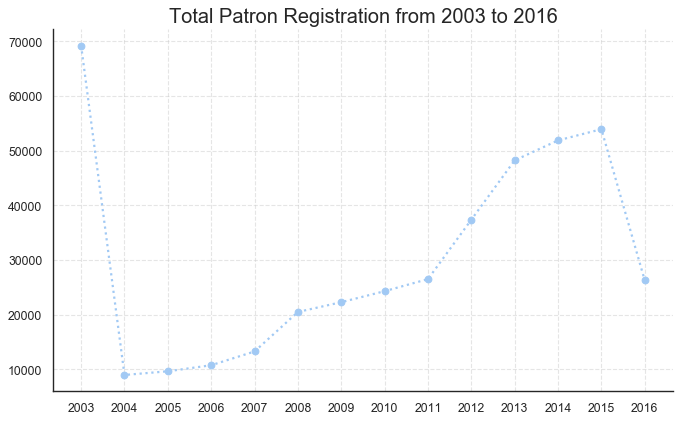

In [26]:
fig = plt.figure(figsize = (10,6), dpi = 80)
ax = fig.add_subplot()
plt.plot(reg_year.registration_year,reg_year.num, 
         marker = 'o',linestyle = ':',
        lw = 2)
ax.set_xticks(range(2003, 2017))
plt.grid(linestyle = '--', alpha = 0.5)
plt.title('Total Patron Registration from 2003 to 2016', fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('2.2 Total Patron Registration from 2003 to 2016.png')

In [27]:
main_pt = ["ADULT","JUVENILE","SENIOR","YOUNG ADULT","WELCOME"]
main_pt_data = df[df.pt_def.isin(main_pt)]
reg_year_main_pt = main_pt_data.groupby(['year_reg','pt_def']).pt_code.count().unstack().reset_index()
reg_year_main_pt

pt_def,year_reg,ADULT,JUVENILE,SENIOR,WELCOME,YOUNG ADULT
0,2003,49931,15,15628,106,2381
1,2004,6088,103,1143,25,1580
2,2005,6240,320,1077,32,1912
3,2006,6740,708,1114,29,2103
4,2007,8082,1589,1215,49,2257
5,2008,12896,2663,2049,87,2714
6,2009,14323,3551,2175,153,1993
7,2010,15711,4713,1841,233,1690
8,2011,16565,6096,1827,293,1628
9,2012,24902,7501,2547,637,1647


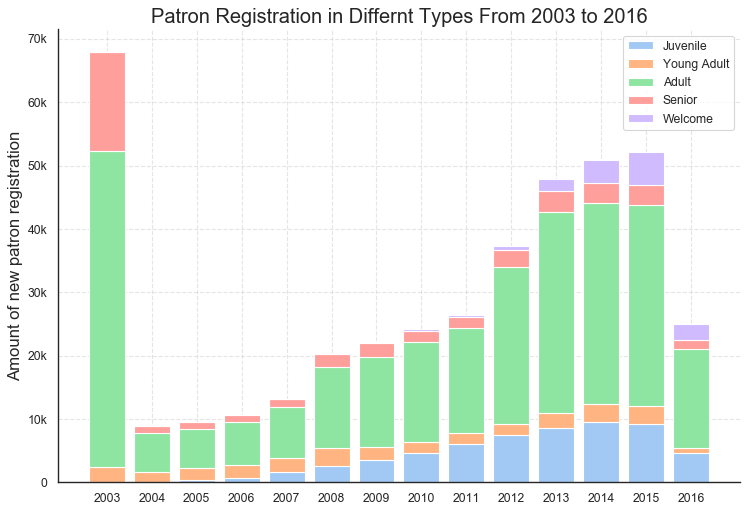

In [28]:
#stacked bar
x = reg_year_main_pt.year_reg
y1 = reg_year_main_pt.JUVENILE
y2 = reg_year_main_pt["YOUNG ADULT"]
y3 = reg_year_main_pt.ADULT
y4 = reg_year_main_pt.SENIOR
y5 = reg_year_main_pt.WELCOME

fig = plt.figure(figsize = (11,7.5), dpi = 80)
sns.set(style = 'white',palette = 'pastel')
ax = fig.add_subplot()
plt.bar(x, y1, label = 'Juvenile')
plt.bar(x, y2, label = "Young Adult", bottom = y1)
plt.bar(x, y3, label = 'Adult',bottom = y1+y2)
plt.bar(x, y4, label = 'Senior',bottom = y1+y2+y3)
plt.bar(x, y5, label = 'Welcome',bottom = y1+y2+y3+y4)
plt.legend()
plt.grid(linestyle = '--', alpha = 0.5)
ax.set_xticks(range(2003,2017))
plt.title('Patron Registration in Differnt Types From 2003 to 2016', fontsize = 18)
plt.ylabel('Amount of new patron registration', fontsize = 15)
plt.yticks(range(0,70001,10000))
ax.set_yticklabels(["0","10k","20k","30k","40k","50k","60k","70k"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('2.3 Patron Registration in Differnt Types From 2003 to 2016.png')

# checkout analysis
## checkout overview

In [29]:
df.head()

,pt_code,pt_def,total_co,total_rn,age_range,ho_lib_code,ho_lib_def,active_month,active_year,notice_prefer_code,notice_prefer_def,provided_email,year_reg,out_of_country,supervisor_district,active_time
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,07,2016,p,phone,False,2003,False,9.0,2016-07-01
1,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0,NaT
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,04,2016,z,email,True,2010,False,4.0,2016-04-01
3,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN,NaT
4,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0,NaT


### describe checkout

In [30]:
df.total_co.describe()

count    423448.000000
mean        161.982097
std         453.703678
min           0.000000
25%           2.000000
50%          19.000000
75%         113.000000
max       35907.000000
Name: total_co, dtype: float64

#### 0 checkout

In [62]:
#pt_def of 0 checkout:
total_pt = df.groupby('pt_def').pt_code.count().reset_index()
zero_co = df[df.total_co == 0]
zero_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73578 entries, 1 to 423447
Data columns (total 16 columns):
pt_code                73578 non-null int64
pt_def                 73578 non-null object
total_co               73578 non-null int64
total_rn               73578 non-null int64
age_range              73489 non-null object
ho_lib_code            73578 non-null object
ho_lib_def             73578 non-null object
active_month           73578 non-null object
active_year            73578 non-null object
notice_prefer_code     73578 non-null object
notice_prefer_def      73578 non-null object
provided_email         73578 non-null bool
year_reg               73578 non-null int64
out_of_country         73578 non-null bool
supervisor_district    41128 non-null float64
active_time            73578 non-null object
dtypes: bool(2), float64(1), int64(4), object(9)
memory usage: 8.6+ MB


In [31]:
zero_pt = zero_co.groupby('pt_def').pt_code.count().reset_index().rename(columns = {"pt_code":"amount"})
zero_pt_per = pd.merge(total_pt, zero_pt, on='pt_def')
zero_pt_per['per'] = round(zero_pt_per.amount/zero_pt_per.pt_code,4)
zero_pt_per.sort_values(by = 'per', inplace = True)
zero_pt_per.rename(columns = {"pt_code":"total_amount",
                             "amount":"zero_co_amount"}, inplace = True)
#zero_pt_per = zero_pt_per.per.map(lambda x: (%.2f%%)%x) (lambda x:format(x, '.2%'))
zero_pt_per = zero_pt_per.reset_index(drop = True)
zero_pt_per

,pt_def,total_amount,zero_co_amount,per
0,RETIRED STAFF,157,1,0.0064
1,STAFF,862,27,0.0313
2,SPECIAL,977,49,0.0502
3,JUVENILE,59208,5263,0.0889
4,AT USER JUVENILE,47,5,0.1064
5,VISITOR,415,46,0.1108
6,BOOKS BY MAIL,95,12,0.1263
7,TEACHER CARD,1782,227,0.1274
8,AT USER ADULT,349,50,0.1433
9,SENIOR,41619,6802,0.1634


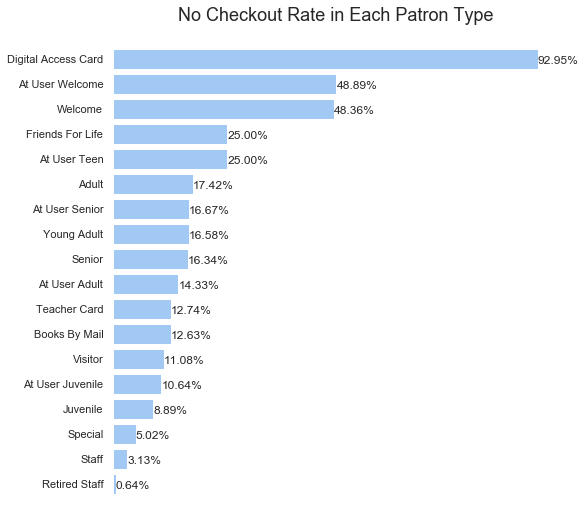

In [32]:
fig = plt.figure(figsize = (8,9))
ax = fig.add_subplot()
plt.barh(range(len(zero_pt_per)), zero_pt_per.per)
ax.set_xticks([])
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
#ax.set_xticklabels(["0%","20%","40%","60%","80%","100%"])
ax.set_yticks(range(len(zero_pt_per)))
pt_def = zero_pt_per.pt_def.str.title()
ax.set_yticklabels(pt_def)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("No Checkout Rate in Each Patron Type", size = 18)
label_data = zero_pt_per.per.map(lambda x: format(x, ".2%"))
for x, y, data in zip(zero_pt_per.per, range(len(zero_pt_per)), label_data):
    plt.text(x ,y-0.2,data)
#plt.savefig("3.11 no checkout rate in each patron type.png")

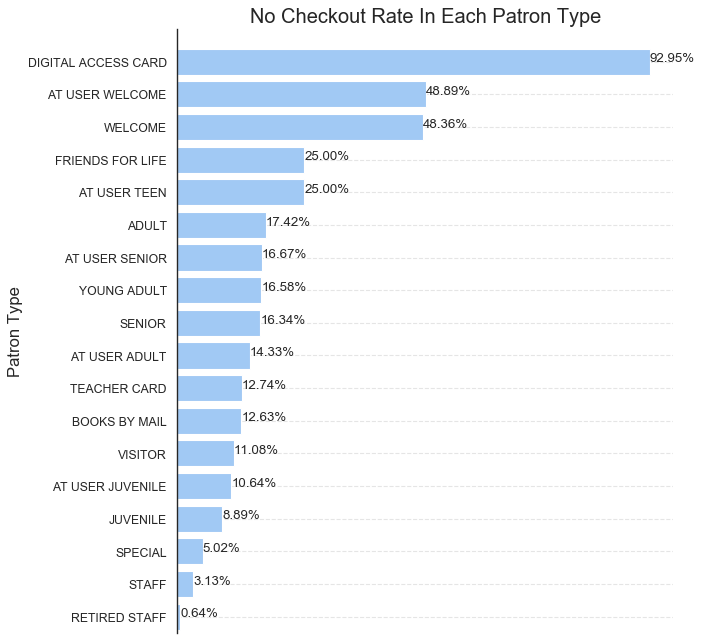

In [33]:
fig = plt.figure(figsize = (8,10), dpi = 80)
sns.set(style = 'white',palette = 'pastel')
ax = fig.add_subplot()
plt.barh(range(len(zero_pt_per)),zero_pt_per.per)
ax.set_yticks(range(len(zero_pt_per)))
ax.set_yticklabels(zero_pt_per.pt_def)
#plt.xlim(0,1)
#ax.set_xticklabels(["0%","20%","40%","60%","80%","100%"])
plt.xticks([])
plt.grid(linestyle = '--', alpha = 0.5)
plt.title('No checkout rate in each patron type'.title(), fontsize = 18)
plt.ylabel('Patron Type', fontsize = 15)
#plt.xlabel('Rate of No Checkout Record', fontsize = 15)
y_data = zero_pt_per.per.map(lambda x: format(x, ".2%"))
for y, x, y_data in zip(range(len(zero_pt_per)),zero_pt_per.per, y_data):
    plt.text(x, y, y_data)
plt.ylim(-0.5,len(zero_pt_per))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#plt.savefig("3.11 no checkout rate in each patron type.png")

#### checkout per stack for each patron type

In [34]:
co_pt = df[['pt_def','total_co']]
bins_copt = [0,1,2,11,35000]
labels_copt = ['zero','one',"2-10",'more than one']
co_pt['co_group'] = pd.cut(co_pt.total_co, bins = bins_copt, labels = labels_copt,
                          right = False)
co_pt_group = pd.pivot_table(data = co_pt, index = 'pt_def', 
                           columns = 'co_group',
                          values = "total_co", aggfunc = len)
co_pt_group = co_pt.groupby(['pt_def','co_group']).total_co.count().unstack().fillna(0)
total = co_pt_group.apply(lambda x: x.sum(), axis = 1).reset_index()
total['zero_per'] = co_pt_group.zero.values/(total.iloc[:,1].values)
total["one_per"] = co_pt_group.one.values/(total.iloc[:,1].values)
total["two_to_ten"] = co_pt_group['2-10'].values/(total.iloc[:,1].values)
total["ten_more_per"] = co_pt_group["more than one"].values/(total.iloc[:,1].values)
total

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,pt_def,0,zero_per,one_per,two_to_ten,ten_more_per
0,ADULT,272250.0,0.174189,0.053612,0.216026,0.556173
1,AT USER ADULT,349.0,0.143266,0.040115,0.237822,0.578797
2,AT USER JUVENILE,47.0,0.106383,0.042553,0.212766,0.638298
3,AT USER SENIOR,66.0,0.166667,0.030303,0.151515,0.651515
4,AT USER TEEN,44.0,0.250000,0.068182,0.227273,0.454545
5,AT USER WELCOME,45.0,0.488889,0.311111,0.155556,0.044444
6,BOOKS BY MAIL,95.0,0.126316,0.010526,0.115789,0.747368
7,DIGITAL ACCESS CARD,1744.0,0.929472,0.017775,0.025803,0.026950
8,FRIENDS FOR LIFE,40.0,0.250000,0.000000,0.050000,0.700000
9,JUVENILE,59208.0,0.088890,0.026922,0.170298,0.713890


In [35]:
x = range(len([0,7,8,9,11,13,14,15,16,17]))
y1 = total.zero_per[[0,7,8,9,11,13,14,15,16,17]].values
y2 = total.one_per[[0,7,8,9,11,13,14,15,16,17]].values
y3 = total.two_to_ten[[0,7,8,9,11,13,14,15,16,17]].values
y4 = total.ten_more_per[[0,7,8,9,11,13,14,15,16,17]].values
xticklabels = total.pt_def[[0,7,8,9,11,13,14,15,16,17]].values

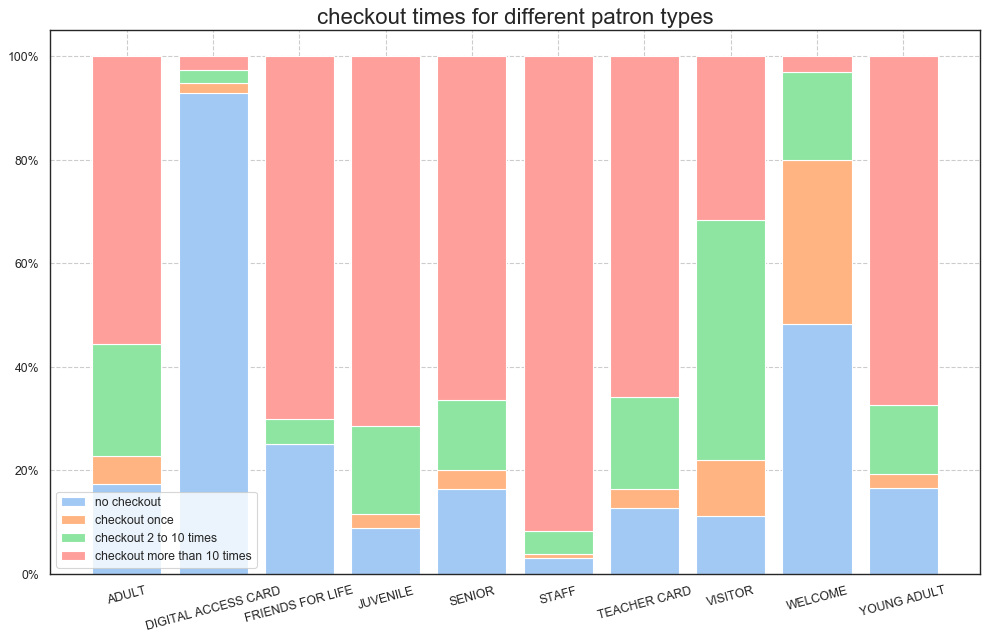

In [36]:
fig = plt.figure(figsize = (15,9), dpi = 80)
ax = fig.add_subplot()
plt.bar(x, y1, label = "no checkout")
plt.bar(x, y2, bottom = y1, label = "checkout once")
plt.bar(x, y3, bottom = y2+y1, label = "checkout 2 to 10 times")
plt.bar(x, y4, bottom = y1+y2+y3, label = "checkout more than 10 times")
plt.xticks(range(len([0,7,8,9,11,13,14,15,16,17])))
ax.set_xticklabels(xticklabels, rotation = 15)
plt.title('checkout times for different patron types', fontsize = 20)
plt.grid(linestyle = '--')
plt.yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(["0%","20%","40%","60%","80%","100%"])
plt.legend()
#plt.savefig('3.11 checkout times for different patron types.png')

### describe renew

In [37]:
df.total_rn.describe()

count    423448.000000
mean         59.657327
std         225.009917
min           0.000000
25%           0.000000
50%           2.000000
75%          27.000000
max        8965.000000
Name: total_rn, dtype: float64

In [38]:
have_renew = df[df.total_rn > 0]
have_renew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246661 entries, 0 to 423445
Data columns (total 16 columns):
pt_code                246661 non-null int64
pt_def                 246661 non-null object
total_co               246661 non-null int64
total_rn               246661 non-null int64
age_range              246617 non-null object
ho_lib_code            246622 non-null object
ho_lib_def             246661 non-null object
active_month           246661 non-null object
active_year            246661 non-null object
notice_prefer_code     246661 non-null object
notice_prefer_def      246661 non-null object
provided_email         246661 non-null bool
year_reg               246661 non-null int64
out_of_country         246661 non-null bool
supervisor_district    193911 non-null float64
active_time            246658 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 28.7+ MB


In [39]:
have_renew.total_rn.describe()

count    246661.000000
mean        102.414958
std         287.293832
min           1.000000
25%           5.000000
50%          19.000000
75%          75.000000
max        8965.000000
Name: total_rn, dtype: float64

In [40]:
rn_pt = have_renew.groupby("pt_def").total_rn.agg(['mean', 'median']).reset_index()
rn_pt.drop(range(1,6), axis = 0, inplace = True)
#rn_pt.columns = [['pt_def','mean_rn','median_rn']]
rn_pt = rn_pt.sort_values(by = "median", ascending = False)
rn_pt.reset_index(drop = True, inplace = True)
#rn_pt.to_excel("3.2 renewal patron type.xlsx")
rn_pt

,pt_def,mean,median
0,STAFF,635.763224,334.0
1,RETIRED STAFF,516.304636,293.0
2,FRIENDS FOR LIFE,292.214286,128.0
3,BOOKS BY MAIL,177.581081,45.0
4,SENIOR,138.346544,26.0
5,SPECIAL,126.181694,25.0
6,ADULT,100.297839,19.0
7,YOUNG ADULT,88.800514,18.0
8,JUVENILE,80.307099,14.0
9,TEACHER CARD,52.331770,14.0


([], <a list of 0 Text xticklabel objects>)

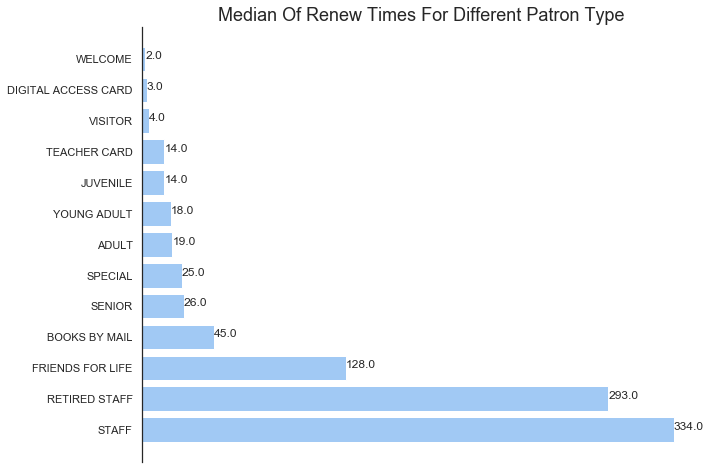

In [41]:
x = rn_pt.iloc[:,2].values
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()
plt.barh(range(13),x)
ax.set_yticks(range(13))
ax.set_yticklabels(rn_pt.iloc[:,0])
for y, x in zip(x, range(13)):
    plt.text(y, x, y, )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('Median of renew times for different patron type'.title(), fontsize = 18)
plt.xticks([])
#plt.savefig('3.12 Median of renew times for different patron type.png')

## relationship between checkout and renewal

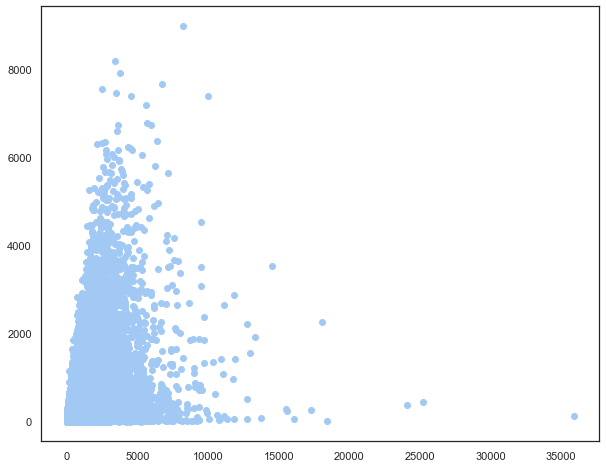

In [42]:
fig = plt.figure(figsize = (10,8))
plt.scatter(df.total_co, df.total_rn)

# check out & home library

In [43]:
co_hl = df.groupby('ho_lib_def').total_co.median().reset_index()
#co_hl.columns = [['ho_lib_def','mean_co','median_co']]
co_hl.sort_values(by = 'total_co', ascending = False)

,ho_lib_def,total_co
4,Branch Bookmobile (Marina),194
3,Branch Bookmobile (Excelsior),130
5,Branch Bookmobile (Sunset),120
8,Chinatown,81
23,Ortega,69
0,Anza,48
33,West Portal,47
26,Portola,45
6,Branch Bookmobile (West Portal),44
30,Sunset,43


In [44]:
co_hl = df.groupby('ho_lib_def').total_co.agg(['median','mean']).reset_index()
#co_hl.columns = [['ho_lib_def','mean_co','median_co']]
co_hl.sort_values(by = 'median', ascending = False, inplace = True)
co_hl = co_hl.reset_index(drop = True)
co_hl = co_hl.drop(10, axis = 0)
co_hl

,ho_lib_def,median,mean
0,Branch Bookmobile (Marina),194,247.857143
1,Branch Bookmobile (Excelsior),130,264.652174
2,Branch Bookmobile (Sunset),120,191.407407
3,Chinatown,81,335.193582
4,Ortega,69,277.749723
5,Anza,48,238.488097
6,West Portal,47,220.404109
7,Portola,45,235.387805
8,Branch Bookmobile (West Portal),44,141.076923
9,Sunset,43,225.835353


# last active

In [45]:
df.active_time = df.active_time.dt.strftime('%Y-%m')
df.head()

,pt_code,pt_def,total_co,total_rn,age_range,ho_lib_code,ho_lib_def,active_month,active_year,notice_prefer_code,notice_prefer_def,provided_email,year_reg,out_of_country,supervisor_district,active_time
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,07,2016,p,phone,False,2003,False,9.0,2016-07
1,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0,NaT
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,04,2016,z,email,True,2010,False,4.0,2016-04
3,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN,NaT
4,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0,NaT


## drop NaT

In [46]:
actived = df[df.active_time != 'NaT']
actived.groupby(['pt_def','active_time']).pt_code.count()

pt_def       active_time
ADULT        2003-12           4
             2004-01           7
             2004-02           5
             2004-03           1
             2004-04           5
                            ... 
YOUNG ADULT  2016-03         581
             2016-04         678
             2016-05        1142
             2016-06        1931
             2016-07        4087
Name: pt_code, Length: 1123, dtype: int64

## calculate timedelta between last active_time to newest time(2016.7)

In [47]:
actived.active_time = pd.to_datetime(actived.active_time)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
#how many months that not active
from datetime import datetime, timedelta
last_date = datetime(2016,7,1)
no_active_months = last_date - actived.active_time
#convert timedelta to int
actived['no_active_days'] = no_active_months/timedelta(days = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
actived['no_active_months'] = round(actived.no_active_days/30, 0)
actived.no_active_months = actived.no_active_months.astype('int')
actived.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pt_code,pt_def,total_co,total_rn,age_range,ho_lib_code,ho_lib_def,active_month,active_year,notice_prefer_code,notice_prefer_def,provided_email,year_reg,out_of_country,supervisor_district,active_time,no_active_days,no_active_months
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,07,2016,p,phone,False,2003,False,9.0,2016-07-01,0.0,0
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,04,2016,z,email,True,2010,False,4.0,2016-04-01,91.0,3
5,0,ADULT,126,11,45 to 54 years,M2,Marina,01,2016,z,email,True,2003,False,2.0,2016-01-01,182.0,6
7,0,ADULT,3002,1689,25 to 34 years,P5,Portola,07,2016,p,phone,True,2004,False,9.0,2016-07-01,0.0,0
8,0,ADULT,4,0,25 to 34 years,C2,Chinatown,07,2014,p,phone,True,2014,False,5.0,2014-07-01,731.0,24


In [50]:
actived.no_active_months.describe()

count    355544.000000
mean         15.977263
std          18.644853
min           0.000000
25%           1.000000
50%          11.000000
75%          25.000000
max         153.000000
Name: no_active_months, dtype: float64

## draw the no active month figures
### no active months overview

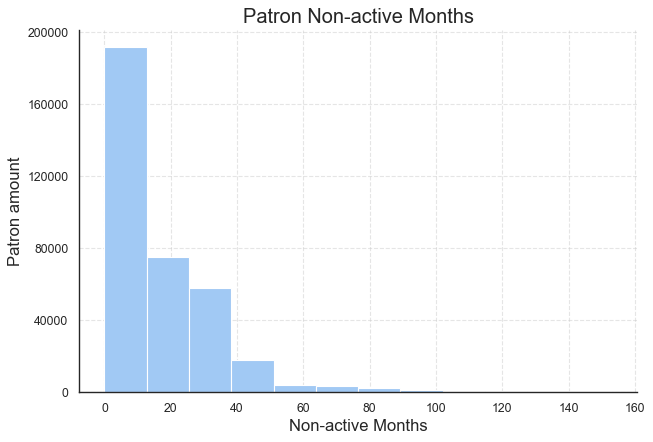

In [51]:
fig = plt.figure(figsize = (9,6),dpi = 80)
ax = fig.add_subplot()
plt.hist(actived.no_active_months, bins = 12)
plt.xlabel("Non-active Months", size = 15)
plt.title("Patron Non-active Months", size = 18)
plt.ylabel("Patron amount", size = 15)
plt.grid(linestyle = "--", alpha = 0.5)
plt.yticks(range(0,200001,40000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig("2.4 Patron non-active months.png")

### no active and patron type

In [52]:
noact_pt = actived.groupby('pt_def').no_active_months.agg(['median','mean']).reset_index()
noact_pt = noact_pt.sort_values(by = 'median')
#noact_pt.to_excel("2.4 noact patron type.xlsx")
noact_pt

,pt_def,median,mean
13,STAFF,0.0,4.809297
10,RETIRED STAFF,0.0,13.243590
14,TEACHER CARD,2.0,4.687183
9,JUVENILE,3.0,9.174275
6,BOOKS BY MAIL,4.0,11.202381
12,SPECIAL,6.0,12.139485
11,SENIOR,6.0,14.661898
8,FRIENDS FOR LIFE,7.0,16.500000
3,AT USER SENIOR,8.0,16.535714
7,DIGITAL ACCESS CARD,10.0,18.148410


# Staff info analysis

In [53]:
staff = df[df.pt_code == 5]
staff.head()

,pt_code,pt_def,total_co,total_rn,age_range,ho_lib_code,ho_lib_def,active_month,active_year,notice_prefer_code,notice_prefer_def,provided_email,year_reg,out_of_country,supervisor_district,active_time
1057,5,STAFF,19,0,45 to 54 years,X,Main Library,04,2011,a,print,False,2003,False,NaN,2011-04
1391,5,STAFF,2204,878,25 to 34 years,W4,Western Addition,07,2016,z,email,True,2003,False,5.0,2016-07
1407,5,STAFF,86,33,35 to 44 years,X,Main Library,07,2016,z,email,True,2012,True,NaN,2016-07
1538,5,STAFF,3706,5899,35 to 44 years,M6,Mission,07,2016,z,email,True,2003,False,9.0,2016-07
1957,5,STAFF,74,19,45 to 54 years,X,Main Library,04,2011,z,email,True,2003,False,NaN,2011-04


In [54]:
staff.describe()

,pt_code,total_co,total_rn,year_reg,supervisor_district
count,862.0,862.000000,862.000000,862.000000,255.000000
mean,5.0,898.316705,585.610209,2005.602088,5.819608
std,0.0,1117.419518,805.875524,4.060020,2.594438
min,5.0,0.000000,0.000000,2003.000000,1.000000
25%,5.0,118.250000,40.000000,2003.000000,4.000000
50%,5.0,497.000000,273.000000,2003.000000,6.000000
75%,5.0,1310.250000,801.000000,2008.000000,8.000000
max,5.0,13362.000000,5899.000000,2016.000000,11.000000


In [55]:
retired_staff = df[df.pt_code == 55]
retired_staff.describe()

,pt_code,total_co,total_rn,year_reg,supervisor_district
count,157.0,157.000000,157.000000,157.000000,97.000000
mean,55.0,1015.343949,496.573248,2003.445860,6.247423
std,0.0,1082.442660,678.417495,1.892614,2.901260
min,55.0,0.000000,0.000000,2003.000000,1.000000
25%,55.0,245.000000,66.000000,2003.000000,4.000000
50%,55.0,684.000000,249.000000,2003.000000,7.000000
75%,55.0,1319.000000,594.000000,2003.000000,8.000000
max,55.0,5267.000000,4673.000000,2014.000000,11.000000


## staff regiestration year

In [56]:
staff_regyear = staff.groupby('year_reg').pt_code.count().reset_index().rename(columns = {"pt_code":"num"})
staff_regyear

,year_reg,num
0,2003,541
1,2004,12
2,2005,37
3,2006,26
4,2007,27
5,2008,30
6,2009,16
7,2010,23
8,2011,30
9,2012,23


In [64]:
staff_regyear.iloc[1:,1].describe()

count    13.000000
mean     24.692308
std       6.908746
min      12.000000
25%      21.000000
50%      24.000000
75%      30.000000
max      37.000000
Name: num, dtype: float64

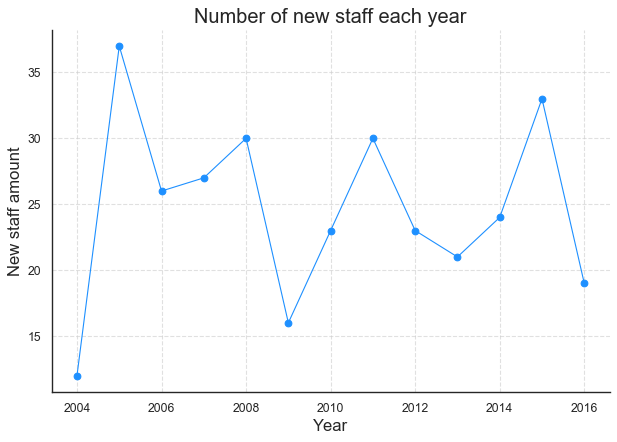

In [57]:
fig = plt.figure(figsize = (9,6), dpi = 80)
x = staff_regyear.iloc[1:, 0]
y = staff_regyear.iloc[1:, 1]
ax = fig.add_subplot()
plt.plot(x,y, marker = 'o',lw = 1, color = "dodgerblue")
plt.grid(linestyle = "--", alpha = 0.6)
plt.title("Number of new staff each year", fontsize = 18)
plt.xlabel('Year', size = 15)
plt.ylabel("New staff amount", size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig("6.1 number of new staff.png")

In [58]:
retired_staff.groupby('year_reg').pt_code.count()

year_reg
2003    146
2004      2
2005      1
2008      2
2011      3
2013      1
2014      2
Name: pt_code, dtype: int64

## current staff age range

In [59]:
staff.groupby('age_range').pt_code.count()

age_range
0 to 9 years         425
10 to 19 years        10
20 to 24 years        12
25 to 34 years        79
35 to 44 years       103
45 to 54 years       114
55 to 59 years        59
60 to 64 years        28
65 to 74 years        23
75 years and over      8
Name: pt_code, dtype: int64

## staff & home library

In [60]:
staff_ho = staff.groupby('ho_lib_def').pt_code.count().sort_values(ascending = False).reset_index().rename(columns = {"pt_code":"num"})
staff_ho

,ho_lib_def,num
0,Main Library,433
1,Chinatown,34
2,Mission,30
3,Richmond,29
4,Ortega,24
5,Sunset,22
6,West Portal,21
7,Excelsior,19
8,Bernal Heights,17
9,Eureka Valley/Harvey Milk Memorial,16


In [61]:
staff_ho.num[1:].describe()

count    30.000000
mean     14.300000
std       7.670589
min       1.000000
25%       9.000000
50%      13.500000
75%      16.750000
max      34.000000
Name: num, dtype: float64

# predict patron type
## 数据预处理

In [143]:
df.head()

,pt_code,pt_def,total_co,total_rn,age_range,ho_lib_code,ho_lib_def,active_month,active_year,notice_prefer_code,notice_prefer_def,provided_email,year_reg,out_of_country,supervisor_district,active_time
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,07,2016,p,phone,False,2003,False,9.0,2016-07-01
1,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0,NaT
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,04,2016,z,email,True,2010,False,4.0,2016-04-01
3,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN,NaT
4,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0,NaT


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pt_code              423448 non-null  int64         
 1   pt_def               423448 non-null  object        
 2   total_co             423448 non-null  int64         
 3   total_rn             423448 non-null  int64         
 4   age_range            423233 non-null  object        
 5   ho_lib_code          423408 non-null  object        
 6   ho_lib_def           423448 non-null  object        
 7   active_month         423448 non-null  object        
 8   active_year          423448 non-null  object        
 9   notice_prefer_code   423448 non-null  object        
 10  notice_prefer_def    423448 non-null  object        
 11  provided_email       423448 non-null  bool          
 12  year_reg             423448 non-null  int64         
 13  out_of_country

In [145]:
#排除at user类
df_predict = df[df.pt_code<100]
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422897 entries, 0 to 423447
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pt_code              422897 non-null  int64         
 1   pt_def               422897 non-null  object        
 2   total_co             422897 non-null  int64         
 3   total_rn             422897 non-null  int64         
 4   age_range            422682 non-null  object        
 5   ho_lib_code          422857 non-null  object        
 6   ho_lib_def           422897 non-null  object        
 7   active_month         422897 non-null  object        
 8   active_year          422897 non-null  object        
 9   notice_prefer_code   422897 non-null  object        
 10  notice_prefer_def    422897 non-null  object        
 11  provided_email       422897 non-null  bool          
 12  year_reg             422897 non-null  int64         
 13  out_of_country

In [147]:
df_predict = df_predict.iloc[:, [0,2,3,4,6,9,11,12,13]]
df_predict.dropna(how = "any", inplace = True)
df_y = df_predict["pt_code"].values
df_X = df_predict.iloc[:,1:].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422682 entries, 0 to 423447
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   pt_code             422682 non-null  int64 
 1   total_co            422682 non-null  int64 
 2   total_rn            422682 non-null  int64 
 3   age_range           422682 non-null  object
 4   ho_lib_def          422682 non-null  object
 5   notice_prefer_code  422682 non-null  object
 6   provided_email      422682 non-null  bool  
 7   year_reg            422682 non-null  int64 
 8   out_of_country      422682 non-null  bool  
dtypes: bool(2), int64(4), object(3)
memory usage: 26.6+ MB


### 类别特征处理

In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
age_range = le.fit(['0 to 9 years','10 to 19 years', 
                    '20 to 24 years', '25 to 34 years',
                    '35 to 44 years','45 to 54 years', 
                   '55 to 59 years', '60 to 64 years',
                   '65 to 74 years','75 years and over'])
df_X[:,2] = le.transform(df_X[:,2])

In [150]:
#provided e-mail
df_X[:, 5] = le.fit_transform(df_X[:,5])
#out_of_country
df_X[:, 7] = le.fit_transform(df_X[:,7])

In [151]:
#host library
df_X[:, 3] = le.fit_transform(df_X[:,3])
#prefered notification
df_X[:, 4] = le.fit_transform(df_X[:,4])

In [152]:
from sklearn.preprocessing import OneHotEncoder
ohe_ho_lib = OneHotEncoder()
#home library definition
ho_lib_X = ohe_ho_lib.fit_transform(df_X[:,3:5]).toarray()

In [153]:
ho_lib_X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

### 分离训练集、测试集

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 0)

## Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt_cl = DecisionTreeClassifier(criterion="entropy")
dt_cl.fit(X_train, y_train)
y_pred = dt_cl.predict(X_test)

In [156]:
dt_cl.score(X_test, y_test)

0.862214178407088

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     56672
           1       0.81      0.82      0.81     11748
           2       0.57      0.56      0.56      5859
           3       0.93      0.93      0.93      8301
           4       0.09      0.29      0.14      1003
           5       0.30      0.28      0.29       185
           8       0.00      0.00      0.00         9
           9       0.47      0.49      0.48       175
          10       0.01      0.02      0.01        52
          12       0.14      0.16      0.15        19
          15       0.10      0.11      0.10       328
          16       0.15      0.35      0.21       148
          55       0.10      0.08      0.09        38

    accuracy                           0.86     84537
   macro avg       0.36      0.38      0.36     84537
weighted avg       0.88      0.86      0.87     84537



In [162]:
from sklearn import tree
with open("decision_tree.dot", 'w') as f:
    f = tree.export_graphviz(dt_cl, out_file = f)

In [158]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(dt_cl, X_train, y_train, cv=10)
print(result.mean())

0.8625500935390858


method: entropy
depth: 2 pred_score: 0.872849 train_score: 0.874217
depth: 3 pred_score: 0.873558 train_score: 0.875003
depth: 4 pred_score: 0.881484 train_score: 0.881805
depth: 5 pred_score: 0.88812 train_score: 0.888566
depth: 6 pred_score: 0.888179 train_score: 0.888693


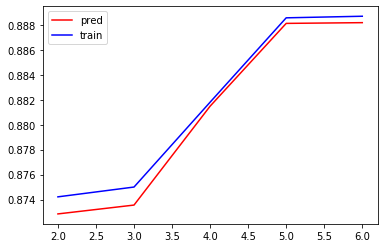

method: gini
depth: 2 pred_score: 0.872849 train_score: 0.874217
depth: 3 pred_score: 0.873558 train_score: 0.875003
depth: 4 pred_score: 0.881484 train_score: 0.881805
depth: 5 pred_score: 0.88812 train_score: 0.888566
depth: 6 pred_score: 0.888179 train_score: 0.888693


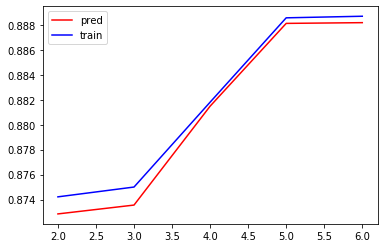

In [159]:
#设置不同depth, method
methods = ["entropy","gini"]
for method in methods:
    print("method:", method)
    pred_scores = []
    train_scores = []
    for d in range(2,7):
        dt_cl_dep = DecisionTreeClassifier(
            max_depth=d, criterion="entropy")
        dt_cl_dep.fit(X_train, y_train)
        train_score = round(dt_cl_dep.score(X_train, y_train),6)
        pred_score = round(dt_cl_dep.score(X_test, y_test),6)
        print("depth:", d, "pred_score:", pred_score,
             "train_score:", train_score)
        pred_scores.append(pred_score)
        train_scores.append(train_score)
    plt.plot(range(2,7), pred_scores, c="r", label="pred")
    plt.plot(range(2,7), train_scores, c="b", label="train")
    plt.legend()
    plt.show()

## Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=10,
                              criterion="entropy")
rf_cl.fit(X_train, y_train)
rf_cl.score(X_test, y_test)

0.8797567928835894

## PCA

In [164]:
from sklearn.decomposition import PCA
pca = PCA()

In [167]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.82861765e-01, 1.16788742e-01, 2.60588903e-04, 6.61559491e-05,
       2.02479216e-05, 1.90320138e-06, 4.76784406e-07, 1.20468459e-07])

# hypothesis test for checkout and renew

## checkout difference among different patron types

In [175]:
pt_co = df[["pt_def","total_co"]]

In [180]:
group_combine = {"AT USER ADULT": "ADULT",
                "AT USER JUVENILE":"JUVENILE",
                "AT USER SENIOR":"SENIOR",
                "AT USER TEEN":"TEEN",
                "AT USER WELCOME":"WELCOME"}
pt_co["pt_def"].replace(group_combine, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [184]:
pt_def = pt_co["pt_def"].unique()
pt_def

array(['ADULT', 'SENIOR', 'WELCOME', 'TEACHER CARD', 'YOUNG ADULT',
       'JUVENILE', 'DIGITAL ACCESS CARD', 'SPECIAL', 'STAFF',
       'RETIRED STAFF', 'VISITOR', 'BOOKS BY MAIL', 'FRIENDS FOR LIFE',
       'TEEN'], dtype=object)

In [224]:
pt_co_anova = {}
for type in pt_def:
    pt_co_anova[type] = pt_co[pt_co.pt_def == type]["total_co"]

In [225]:
from scipy.stats import f_oneway
fstat, pval = f_oneway(pt_co_anova["ADULT"],
                       pt_co_anova["SENIOR"],
                       pt_co_anova["JUVENILE"],
                       pt_co_anova["TEEN"],
                       pt_co_anova["YOUNG ADULT"])
print(fstat)
print(pval)

1442.5100943246507
0.0


In [228]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
v = np.concatenate([pt_co_anova["ADULT"],
                       pt_co_anova["SENIOR"],
                       pt_co_anova["JUVENILE"],
                       pt_co_anova["TEEN"],
                       pt_co_anova["YOUNG ADULT"]])
labels = ["ADULT"]*len(pt_co_anova["ADULT"])+ \
        ["SENIOR"]*len(pt_co_anova["SENIOR"])+ \
        ["JUVENILE"]*len(pt_co_anova["JUVENILE"])+ \
        ["TEEN"]*len(pt_co_anova["TEEN"])+ \
        ["YOUNG ADULT"]*len(pt_co_anova["YOUNG ADULT"])

In [229]:
tukey_results = pairwise_tukeyhsd(v, labels)

In [231]:
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
ADULT,JUVENILE,35.1115,0.001,29.4997,40.7233,True
ADULT,SENIOR,168.3301,0.001,161.8188,174.8413,True
ADULT,TEEN,-45.1182,0.9,-231.7832,141.5469,False
ADULT,YOUNG ADULT,100.6742,0.001,93.0048,108.3435,True
JUVENILE,SENIOR,133.2186,0.001,125.3039,141.1333,True
JUVENILE,TEEN,-80.2296,0.7402,-266.9489,106.4896,False
JUVENILE,YOUNG ADULT,65.5627,0.001,56.6709,74.4546,True
SENIOR,TEEN,-213.4482,0.0157,-400.1967,-26.6998,True
SENIOR,YOUNG ADULT,-67.6559,0.001,-77.141,-58.1707,True
TEEN,YOUNG ADULT,145.7923,0.2077,-41.0001,332.5847,False


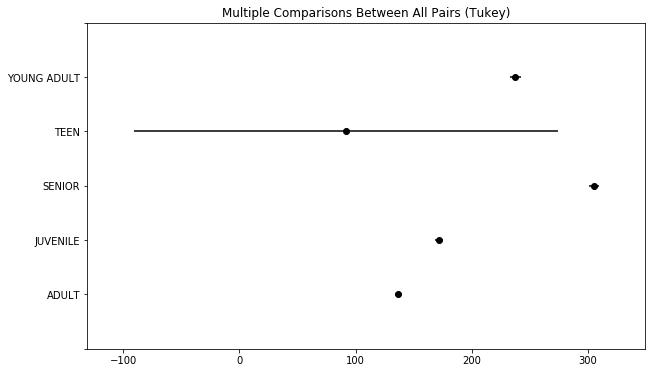

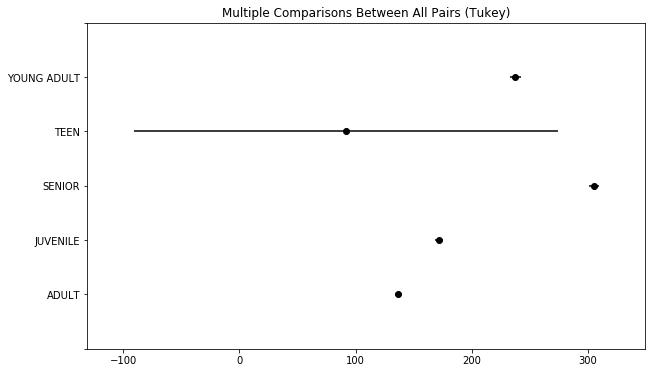

In [232]:
tukey_results.plot_simultaneous()

## checkout differences among different home library

In [6]:
df.head()

,pt_code,pt_def,total_co,total_rn,age_range,ho_lib_code,ho_lib_def,active_month,active_year,notice_prefer_code,notice_prefer_def,provided_email,year_reg,out_of_country,supervisor_district,active_time
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,07,2016,p,phone,False,2003,False,9.0,2016-07-01
1,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0,NaT
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,04,2016,z,email,True,2010,False,4.0,2016-04-01
3,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN,NaT
4,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0,NaT


In [7]:
holib_co = df.loc[:,["total_co","ho_lib_def"]]

In [64]:
home_libs = holib_co.groupby("ho_lib_def").total_co.count()
home_libs = home_libs[home_libs>2000]
holib_co = holib_co[holib_co.ho_lib_def.isin(home_libs.index)]

In [65]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
anova_holib_co = anova_lm(ols("total_co~ho_lib_def", data = holib_co).fit())
print(anova_holib_co)

                  df        sum_sq       mean_sq           F  PR(>F)
ho_lib_def      27.0  1.590227e+09  5.889729e+07  291.662848     0.0
Residual    420172.0  8.484794e+10  2.019362e+05         NaN     NaN


In [68]:
tukey_results = pairwise_tukeyhsd(holib_co.total_co, holib_co.ho_lib_def)

In [69]:
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Anza,Bayview/Linda Brooks-Burton,-177.577,0.001,-204.3901,-150.7638,True
Anza,Bernal Heights,-96.7458,0.001,-122.7698,-70.7218,True
Anza,Chinatown,96.7055,0.001,73.2433,120.1676,True
Anza,Eureka Valley/Harvey Milk Memorial,-51.9334,0.001,-78.5395,-25.3274,True
Anza,Excelsior,-78.2882,0.001,-101.8401,-54.7362,True
Anza,Glen Park,-68.2558,0.001,-94.177,-42.3346,True
Anza,Golden Gate Valley,-96.5438,0.001,-128.5425,-64.5451,True
Anza,Ingleside,-56.5933,0.001,-82.0372,-31.1494,True
Anza,Main Library,-129.1662,0.001,-149.4204,-108.912,True
Anza,Marina,-117.6528,0.001,-143.148,-92.1576,True
